<a href="https://colab.research.google.com/github/genkioverdrive/EDA/blob/main/Exploratory_Data_Analysis_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Dataset loaded from csv file
data = pd.read_csv("https://raw.githubusercontent.com/genkioverdrive/EDA/refs/heads/main/covid-data.csv")

###Task 1
-Dimension of dataset

In [2]:
print(data.shape)

(5818, 67)


###Task 2
- Summary of dataset

In [3]:
print(data.describe)

<bound method NDFrame.describe of      iso_code continent     location        date  total_cases  new_cases  \
0         AFG      Asia  Afghanistan  24/02/2020            5          5   
1         AFG      Asia  Afghanistan  25/02/2020            5          0   
2         AFG      Asia  Afghanistan  26/02/2020            5          0   
3         AFG      Asia  Afghanistan  27/02/2020            5          0   
4         AFG      Asia  Afghanistan  28/02/2020            5          0   
...       ...       ...          ...         ...          ...        ...   
5813      NGA    Africa      Nigeria  06/10/2022       265741        236   
5814      NGA    Africa      Nigeria  07/10/2022       265741          0   
5815      NGA    Africa      Nigeria  08/10/2022       265816         75   
5816      NGA    Africa      Nigeria  09/10/2022       265816          0   
5817      NGA    Africa      Nigeria  10/10/2022       265816          0   

      new_cases_smoothed  total_deaths  new_deaths  n

###Task 3
- Data handling

In [4]:
#check for missing values
missing_values = data.isnull().sum()

###Task 4
- Data cleaning

In [5]:
#dropping columns with more than 50% missing values
threshold = 0.5*data.shape[0]
clean_data = data.dropna(thresh=threshold, axis=1)

#rechecking for missing values
missing_values_cleaned = clean_data.isnull().sum()

#filling missing numeric values with mean and categorical with mode
numeric_columns = clean_data.select_dtypes(include=['float64','int64']).columns
categorical_columns = clean_data.select_dtypes(exclude=['object']).columns

clean_data[numeric_columns] = clean_data[numeric_columns].fillna(clean_data[numeric_columns].mean())
clean_data[categorical_columns] = clean_data[categorical_columns].fillna(clean_data[categorical_columns].mode().iloc[0])

#verification
clean_data_verify = clean_data.info()

print(missing_values, missing_values_cleaned, clean_data_verify)

print(clean_data[numeric_columns])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    5818 non-null   object 
 1   continent                                   5818 non-null   object 
 2   location                                    5818 non-null   object 
 3   date                                        5818 non-null   object 
 4   total_cases                                 5818 non-null   int64  
 5   new_cases                                   5818 non-null   int64  
 6   new_cases_smoothed                          5818 non-null   float64
 7   total_deaths                                5818 non-null   float64
 8   new_deaths                                  5818 non-null   float64
 9   new_deaths_smoothed                         5818 non-null   float64
 10  total_cases_

<ipython-input-5-3aefb4d1b0a3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[numeric_columns] = clean_data[numeric_columns].fillna(clean_data[numeric_columns].mean())
<ipython-input-5-3aefb4d1b0a3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data[categorical_columns] = clean_data[categorical_columns].fillna(clean_data[categorical_columns].mode().iloc[0])


##Task 5
- Univariate analysis

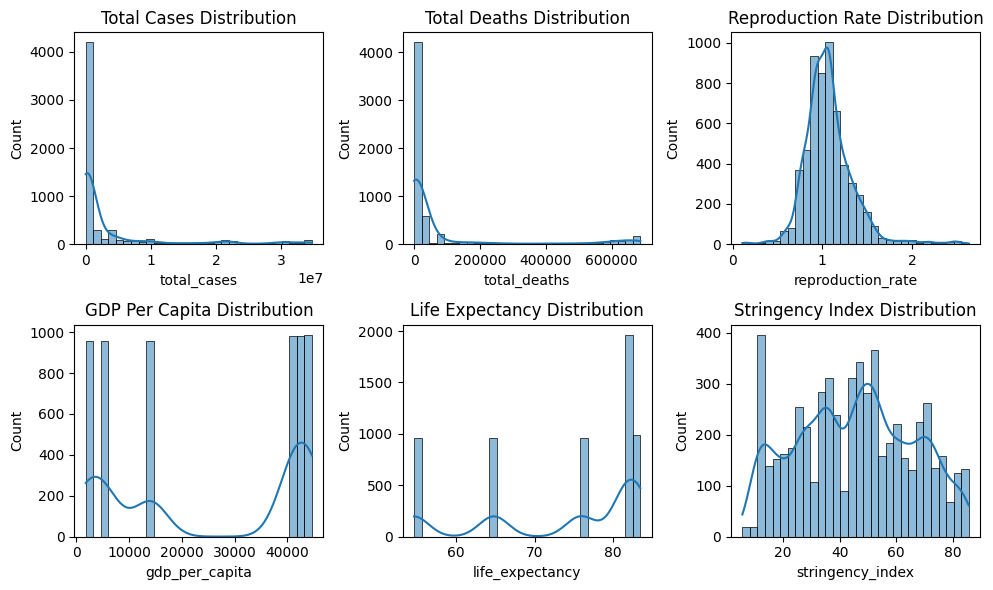

In [6]:
#univariate analysis
plt.figure(figsize=(10,6))

# Plotting distributions of selected key variables
plt.subplot(2, 3, 1)
sns.histplot(clean_data['total_cases'], bins=30, kde=True).set_title('Total Cases Distribution')

plt.subplot(2, 3, 2)
sns.histplot(clean_data['total_deaths'], bins=30, kde=True).set_title('Total Deaths Distribution')

plt.subplot(2, 3, 3)
sns.histplot(clean_data['reproduction_rate'], bins=30, kde=True).set_title('Reproduction Rate Distribution')

plt.subplot(2, 3, 4)
sns.histplot(clean_data['gdp_per_capita'], bins=30, kde=True).set_title('GDP Per Capita Distribution')

plt.subplot(2, 3, 5)
sns.histplot(clean_data['life_expectancy'], bins=30, kde=True).set_title('Life Expectancy Distribution')

plt.subplot(2, 3, 6)
sns.histplot(clean_data['stringency_index'], bins=30, kde=True).set_title('Stringency Index Distribution')

plt.tight_layout()
plt.show()


##Task 6
- Bivariate analysis

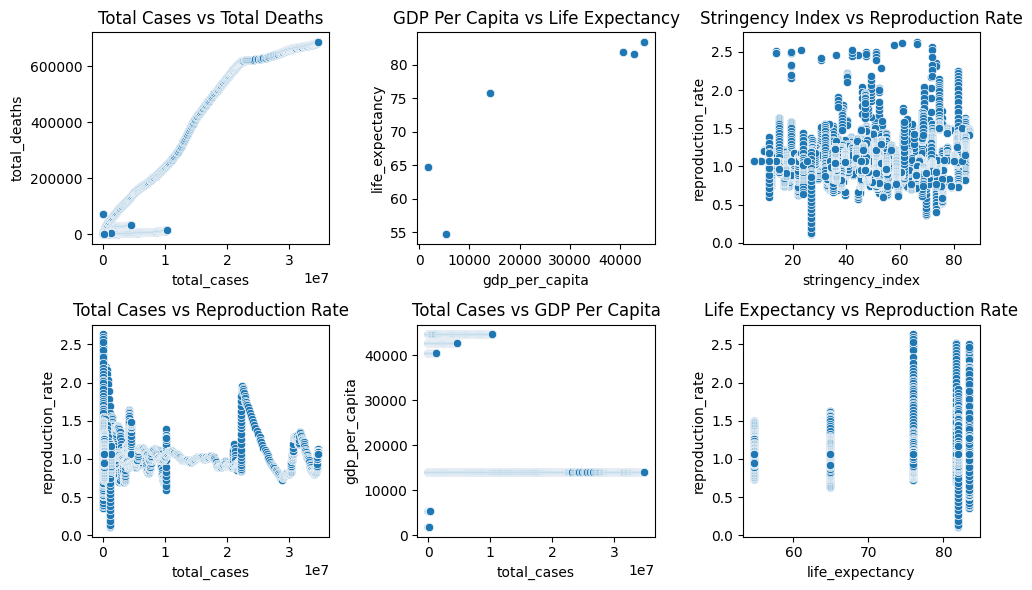

In [7]:
# Bivariate analysis: Relationships between key variables
plt.figure(figsize=(10,6))

# Scatter plots for selected pairs of variables
plt.subplot(2, 3, 1)
sns.scatterplot(x='total_cases', y='total_deaths', data=clean_data).set_title('Total Cases vs Total Deaths')

plt.subplot(2, 3, 2)
sns.scatterplot(x='gdp_per_capita', y='life_expectancy', data=clean_data).set_title('GDP Per Capita vs Life Expectancy')

plt.subplot(2, 3, 3)
sns.scatterplot(x='stringency_index', y='reproduction_rate', data=clean_data).set_title('Stringency Index vs Reproduction Rate')

plt.subplot(2, 3, 4)
sns.scatterplot(x='total_cases', y='reproduction_rate', data=clean_data).set_title('Total Cases vs Reproduction Rate')

plt.subplot(2, 3, 5)
sns.scatterplot(x='total_cases', y='gdp_per_capita', data=clean_data).set_title('Total Cases vs GDP Per Capita')

plt.subplot(2, 3, 6)
sns.scatterplot(x='life_expectancy', y='reproduction_rate', data=clean_data).set_title('Life Expectancy vs Reproduction Rate')

plt.tight_layout()
plt.show()


###Task 7
- Multivariate analysis

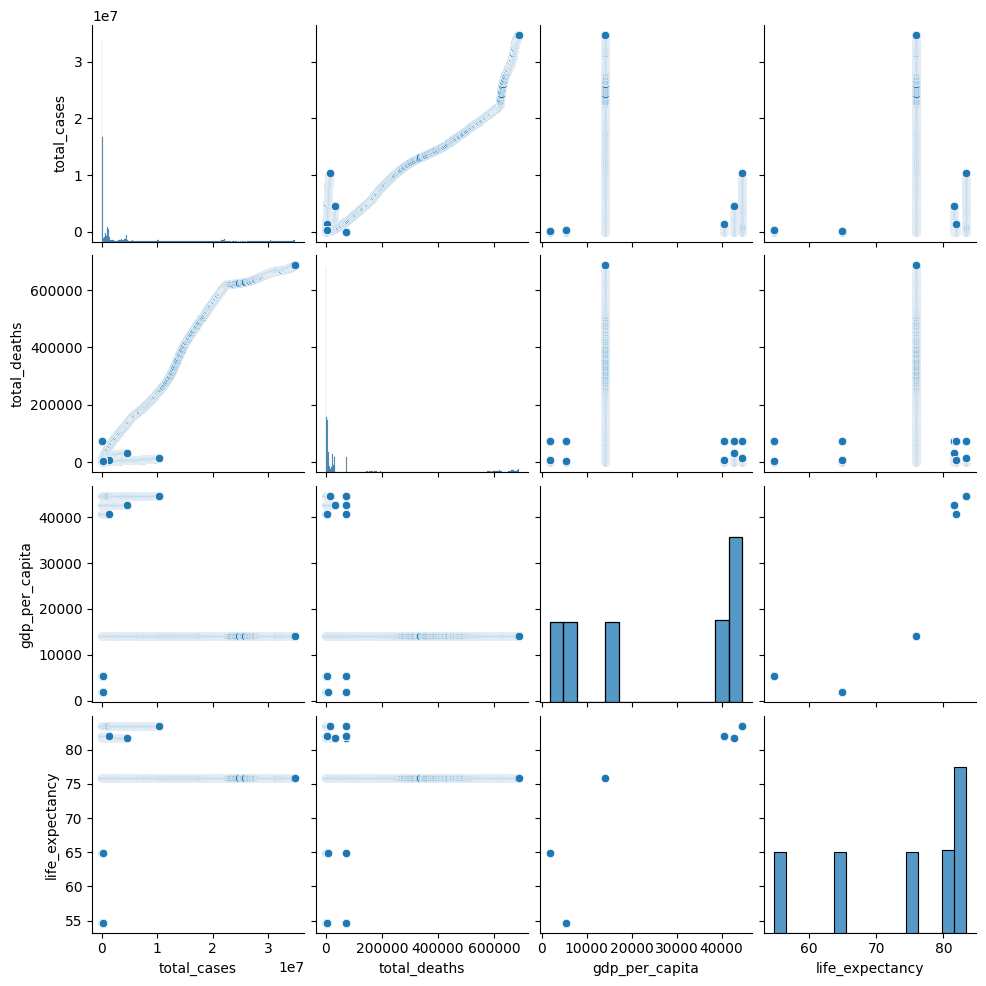

In [8]:
#pair plot for total_cases, total_deaths, gdp_per_capita, life expectancy
sns.pairplot(clean_data, vars=['total_cases', 'total_deaths', 'gdp_per_capita', 'life_expectancy'])
plt.show()

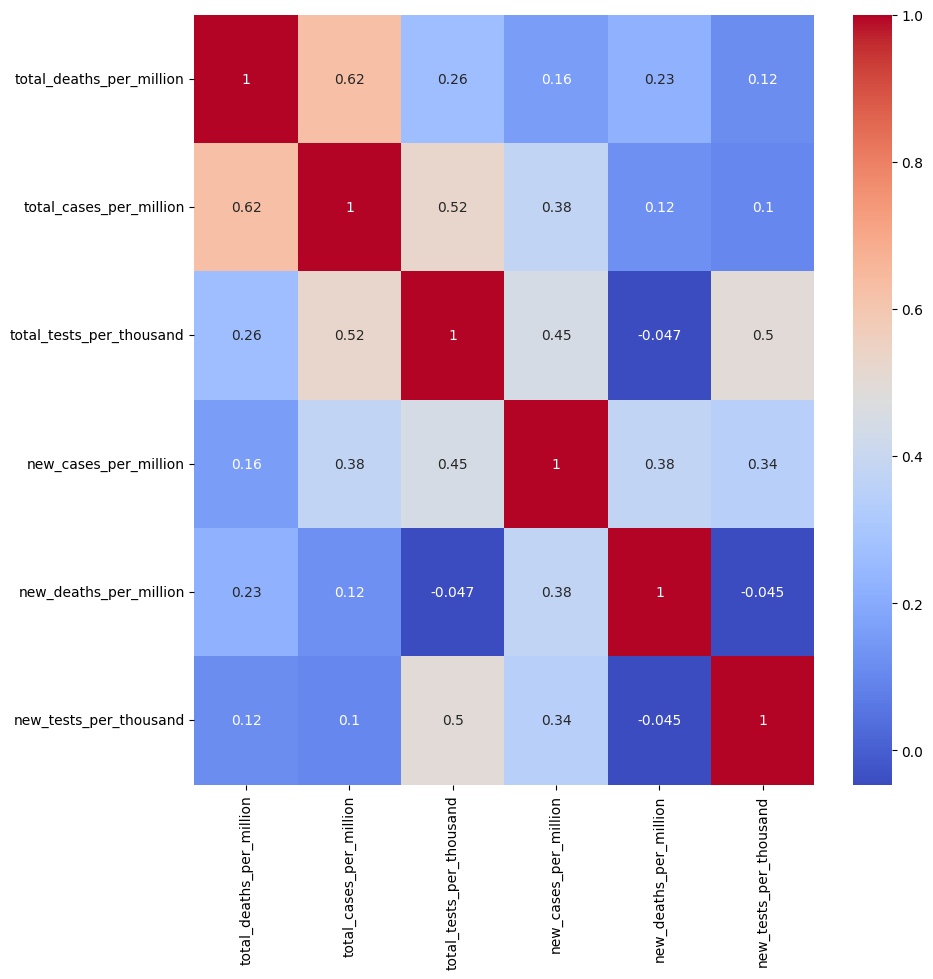

In [9]:
#correlation heatmap
plt.figure(figsize=(10,10))

columns_analysed = ['total_deaths_per_million', 'total_cases_per_million', 'total_tests_per_thousand','new_cases_per_million', 'new_deaths_per_million', 'new_tests_per_thousand']

correlation_matrix = clean_data[columns_analysed].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#Task 8
- Time Series analyis

<ipython-input-10-2a762e5bc794>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  clean_data['date'] = pd.to_datetime(clean_data['date'])
<ipython-input-10-2a762e5bc794>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['date'] = pd.to_datetime(clean_data['date'])


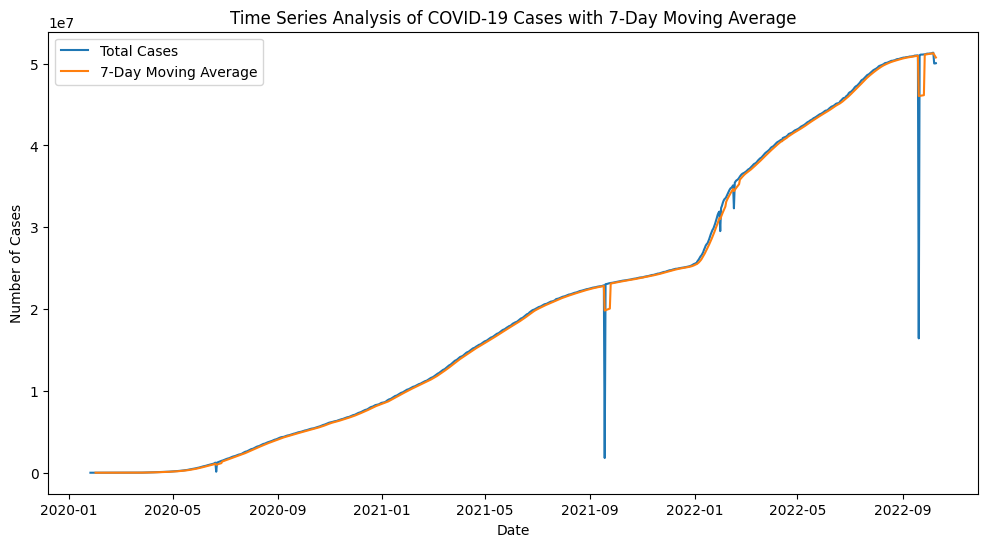

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime objects
clean_data['date'] = pd.to_datetime(clean_data['date'])

# Group by date and calculate the total cases and deaths
time_series_data = clean_data.groupby('date')[['total_cases', 'total_deaths']].sum()

# Plot the time series data
# plt.figure(figsize=(12, 6))
# plt.plot(time_series_data.index, time_series_data['total_cases'], label='Total Cases')
# plt.plot(time_series_data.index, time_series_data['total_deaths'], label='Total Deaths')
# plt.xlabel('Date')
# plt.ylabel('Number of Cases/Deaths')
# plt.title('Time Series Analysis of COVID-19 Cases and Deaths')
# plt.legend()
# plt.show()


time_series_data['total_cases_7day_avg'] = time_series_data['total_cases'].rolling(window=7).mean()

# Plot the original and smoothed series
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['total_cases'], label='Total Cases')
plt.plot(time_series_data.index, time_series_data['total_cases_7day_avg'], label='7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Time Series Analysis of COVID-19 Cases with 7-Day Moving Average')
plt.legend()
plt.show()



##Task 9
- 1-D Analysis


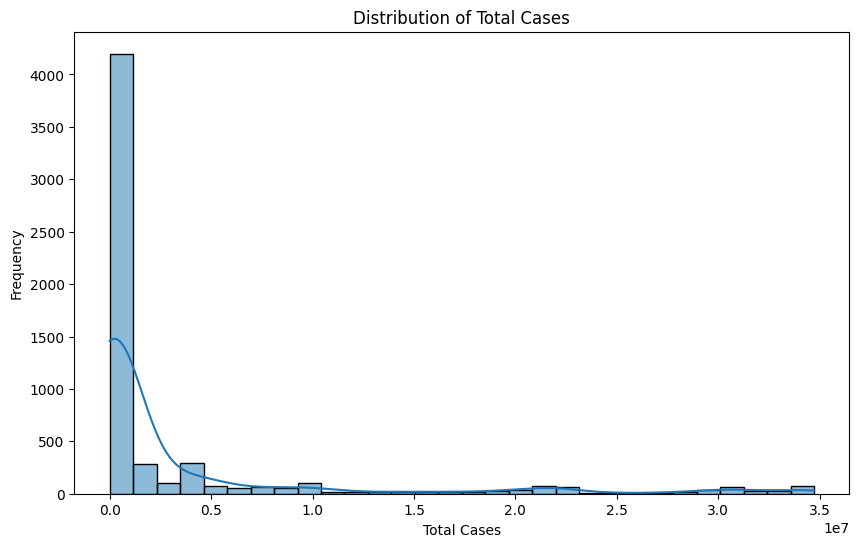

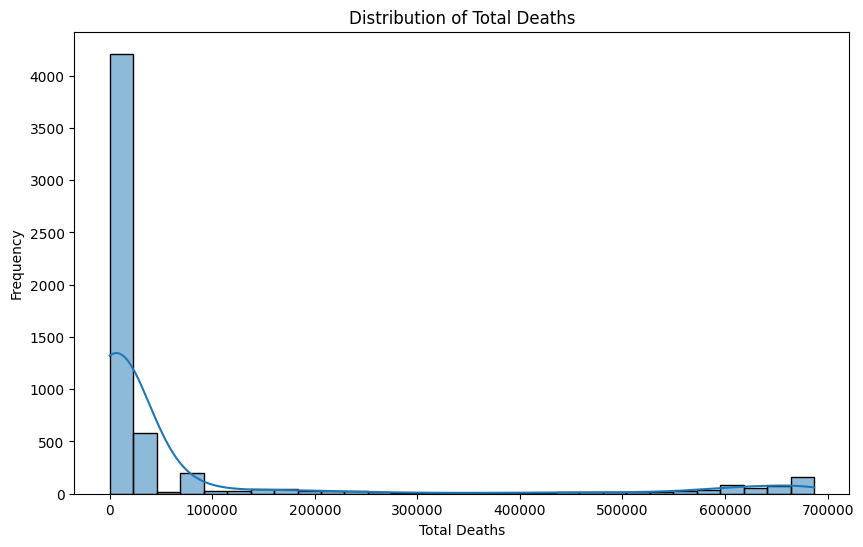

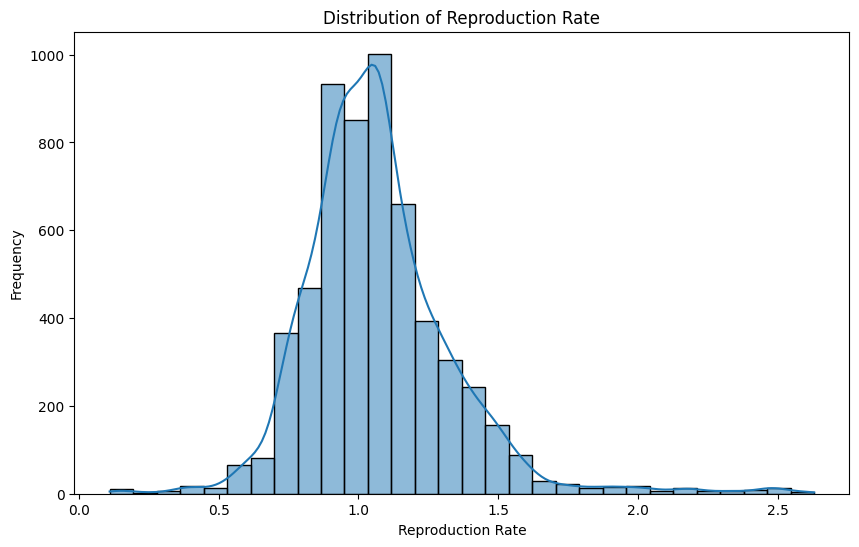

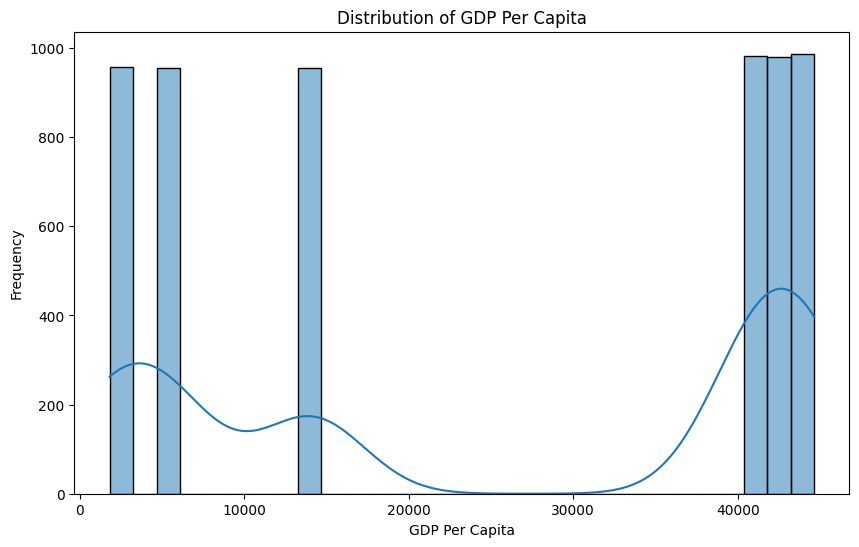

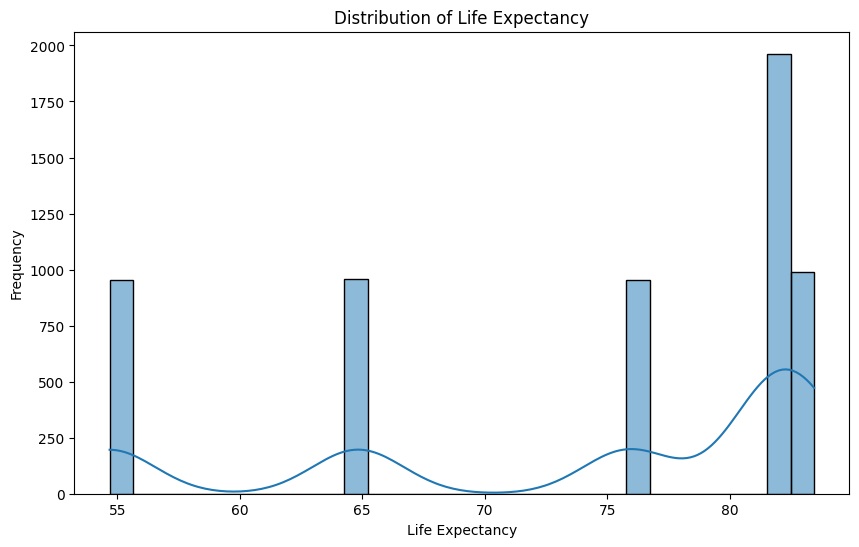

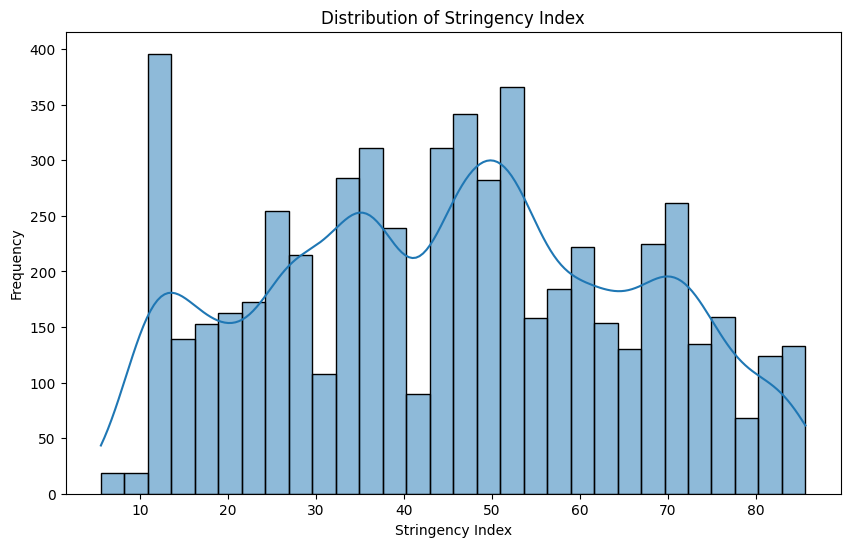

In [12]:
#1-D Analysis
#Analyzing the distribution of total cases
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['total_cases'], bins=30, kde=True)
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Total Cases')
plt.show()

#Analyzing the distribution of total deaths
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['total_deaths'], bins=30, kde=True)
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Total Deaths')
plt.show()


#Analyzing the distribution of reproduction rate
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['reproduction_rate'], bins=30, kde=True)
plt.xlabel('Reproduction Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Reproduction Rate')
plt.show()


#Analyzing the distribution of GDP per capita
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['gdp_per_capita'], bins=30, kde=True)
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency')
plt.title('Distribution of GDP Per Capita')
plt.show()

#Analyzing the distribution of life expectancy
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['life_expectancy'], bins=30, kde=True)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()


#Analyzing the distribution of stringency index
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['stringency_index'], bins=30, kde=True)
plt.xlabel('Stringency Index')
plt.ylabel('Frequency')
plt.title('Distribution of Stringency Index')
plt.show()

##Task 10
- 2-D Analysis

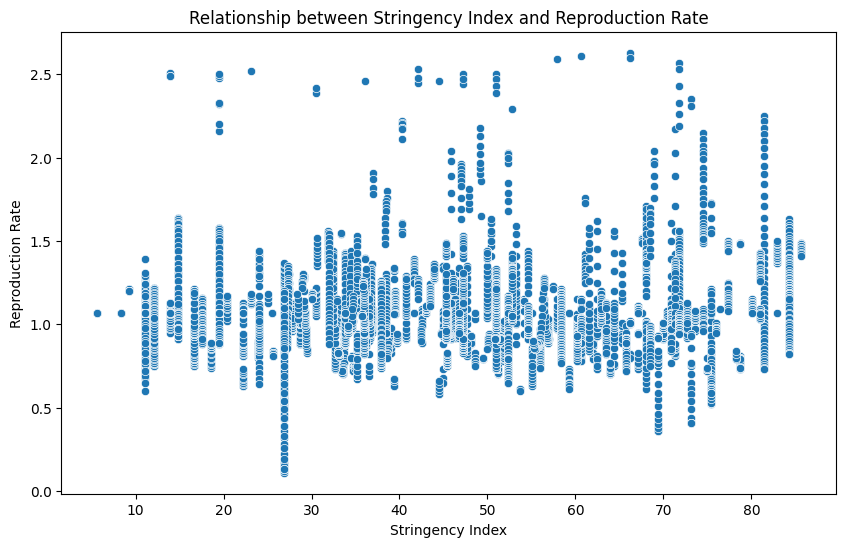

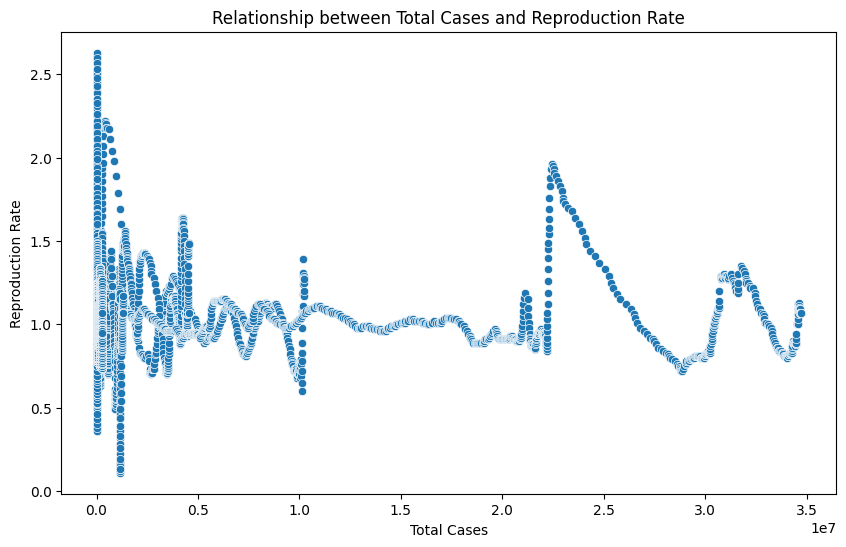

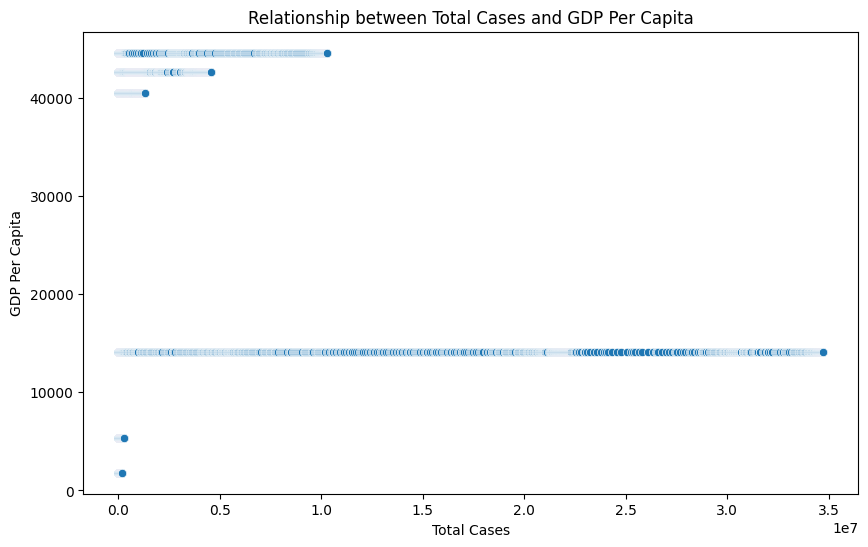

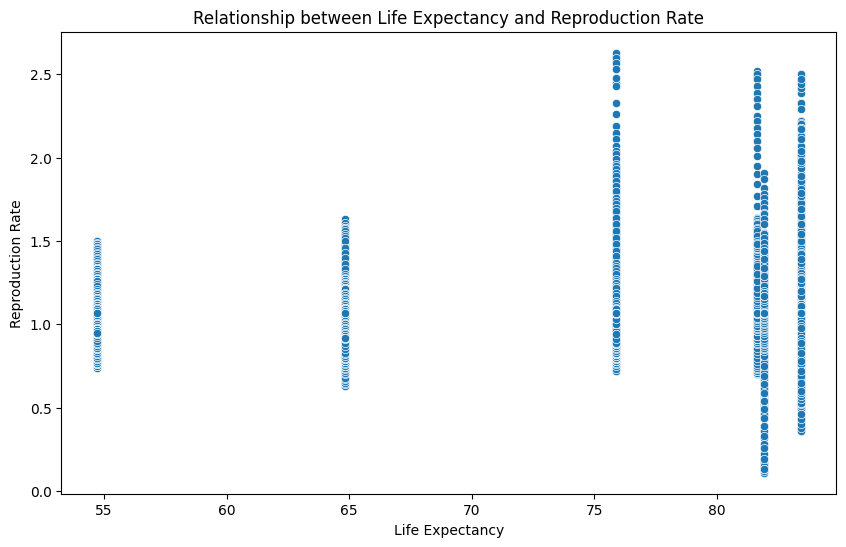

In [16]:
#2-D Analysis
# Analyzing the relationship between stringency index and reproduction rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stringency_index', y='reproduction_rate', data=clean_data)
plt.xlabel('Stringency Index')
plt.ylabel('Reproduction Rate')
plt.title('Relationship between Stringency Index and Reproduction Rate')
plt.show()

# Analyzing the relationship between total cases and reproduction rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_cases', y='reproduction_rate', data=clean_data)
plt.xlabel('Total Cases')
plt.ylabel('Reproduction Rate')
plt.title('Relationship between Total Cases and Reproduction Rate')
plt.show()

# Analyzing the relationship between total cases and GDP per capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_cases', y='gdp_per_capita', data=clean_data)
plt.xlabel('Total Cases')
plt.ylabel('GDP Per Capita')
plt.title('Relationship between Total Cases and GDP Per Capita')
plt.show()

# Analyzing the relationship between life expectancy and reproduction rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='life_expectancy', y='reproduction_rate', data=clean_data)
plt.xlabel('Life Expectancy')
plt.ylabel('Reproduction Rate')
plt.title('Relationship between Life Expectancy and Reproduction Rate')
plt.show()

##Task 11
- n-D Analysis

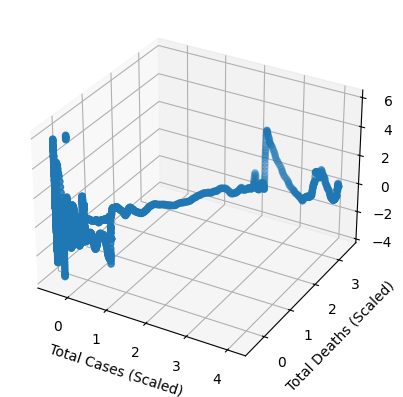

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'clean_data' is your cleaned DataFrame from previous steps

# Select relevant numerical features for n-D analysis
features_for_analysis = ['total_cases', 'total_deaths', 'reproduction_rate', 'gdp_per_capita', 'life_expectancy', 'stringency_index']
data_for_analysis = clean_data[features_for_analysis]

# Standardize the data (important for some distance calculations)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_analysis)

distances = np.linalg.norm(scaled_data[:, np.newaxis, :] - scaled_data[np.newaxis, :, :], axis=2)

reference_point_index = 0
similar_points_indices = np.argsort(distances[reference_point_index])[1:11]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2])
ax.set_xlabel('Total Cases (Scaled)')
ax.set_ylabel('Total Deaths (Scaled)')
ax.set_zlabel('Reproduction Rate (Scaled)')
plt.show()


##Task 12
- Clustering

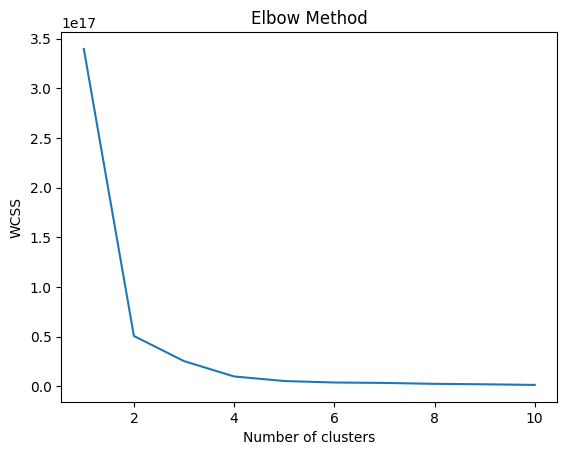

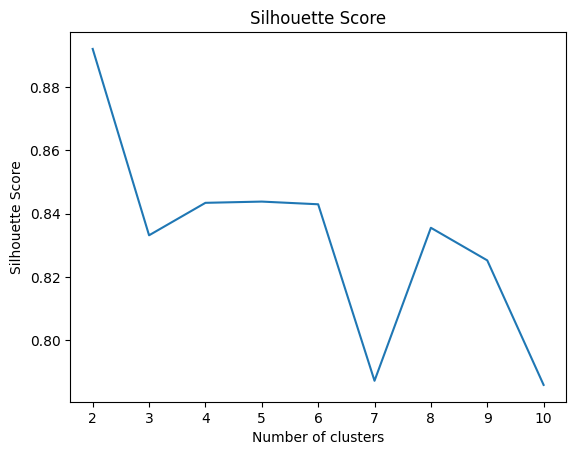

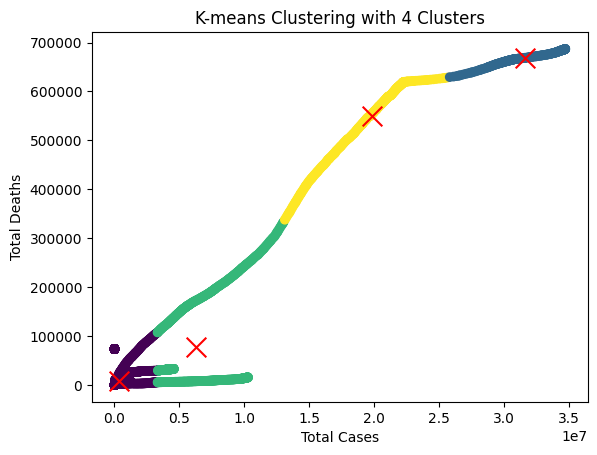

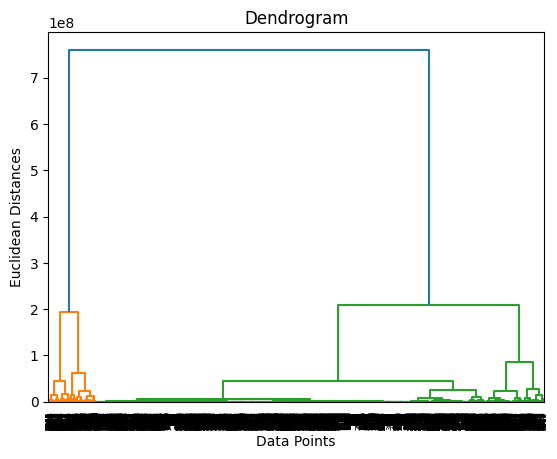

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

X = clean_data[['total_cases', 'total_deaths']]

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = 4

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Scatter plot of clusters with centroids
plt.scatter(X['total_cases'], X['total_deaths'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.title('K-means Clustering with {} Clusters'.format(optimal_k))
plt.show()

# Dendrogram to show the clustering
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

##Task 13
- PCA

[9.9995670e-01 3.8265604e-05]


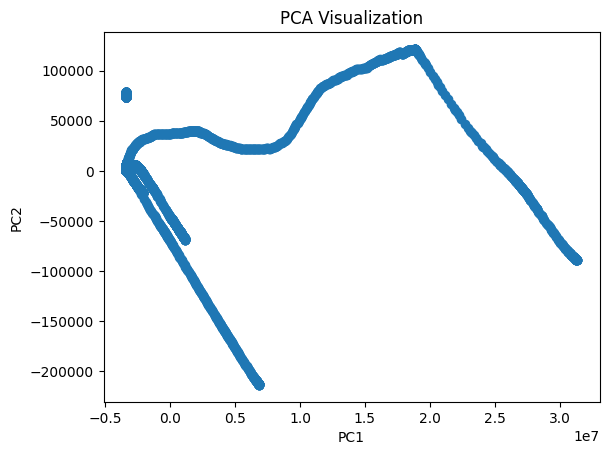

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(data_for_analysis)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca.explained_variance_ratio_)

plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()